<a href="https://colab.research.google.com/github/leandrobarbieri/python-datascience-ml/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# carrega o dataframe de exemplo tips
tips = sns.load_dataset('tips')

# tamanho padrão da fig caso não seja especificado
plt.rc('figure', figsize=(8, 4))

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Estilos de gráficos

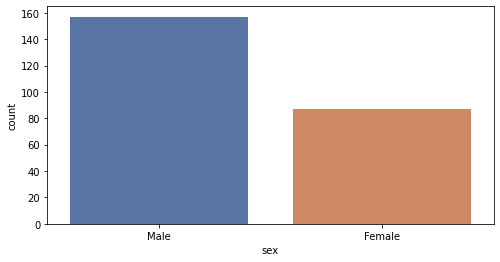

In [6]:
# countplot: quantidade de linhas em cada categoria
sns.countplot(x="sex", data=tips, palette="deep")
sns.set_style("white")

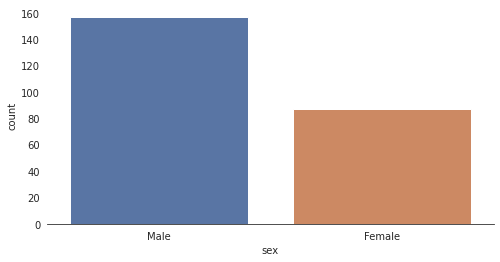

In [7]:
sns.countplot(x="sex", data=tips, palette="deep")
sns.set_style("ticks")
sns.despine(left=True)

## Tamanho

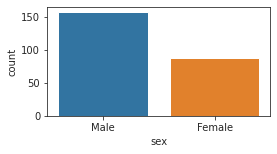

In [8]:
# podemos usar o figsize do matplotlib para alterar o tamanho dos graficos no seaborn
plt.figure(figsize=(4,2))
sns.countplot(x="sex", data=tips)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


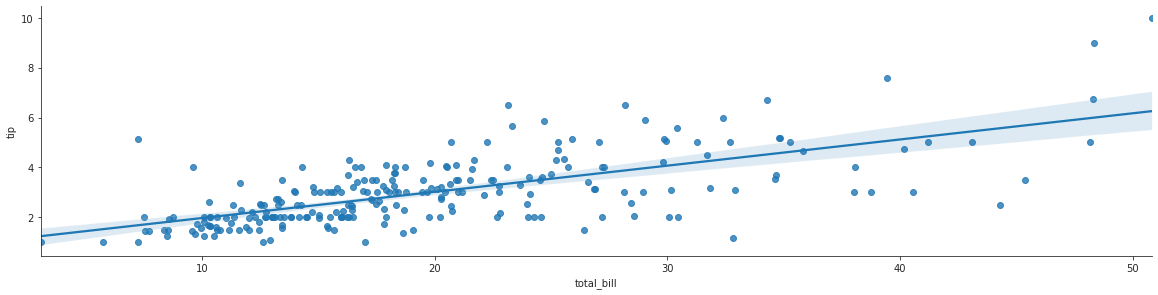

In [9]:
# grafico tipo regressao
sns.lmplot(x="total_bill", y="tip", data=tips, size=4, aspect=4)

# Plots de distribuição
Distribuição de valores numéricos ajudam analisar a disperção e variabilidade
* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## distplot
Mostra a distribuição dos valores de uma variável numerica (histograma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


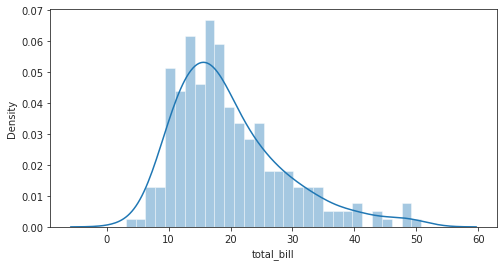

In [10]:
# bins: quantidade de barras de distribuição
sns.distplot(tips["total_bill"], bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


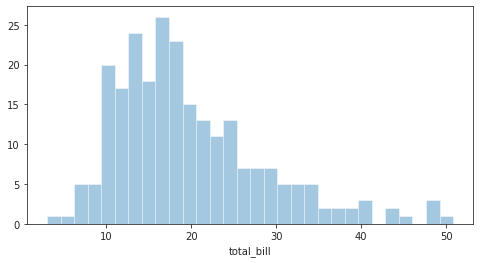

In [11]:
# remover a linha e usar apenas o histograma
# kde: gaussian kernel density estimate ???

sns.distplot(tips["total_bill"], bins=30, kde=False)

## jointplot
Cria curvas de distribuição para duas variaveis ao mesmo tempo
Combina dois displots hist em cada eixo e no centro a distribuição dos pontos correlacionados: 
- kind: Tipos de visualização
> “scatter” “reg” “resid” “kde” “hex”
https://seaborn.pydata.org/generated/seaborn.jointplot.html

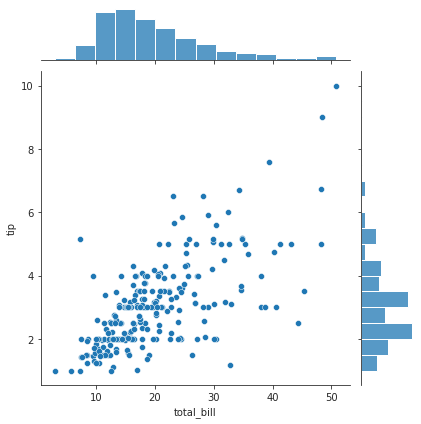

In [12]:
# mostra um hist em cada eixo ao mesmo tempo cada ponto no scatter plot
sns.jointplot(x="total_bill", y="tip", data=tips, kind="scatter")

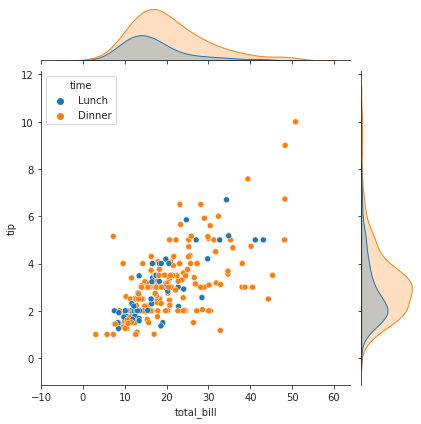

In [13]:
# mostra um hist em cada eixo ao mesmo tempo cada ponto no scatter plot
sns.jointplot(x="total_bill", y="tip", data=tips, kind="scatter", hue="time")

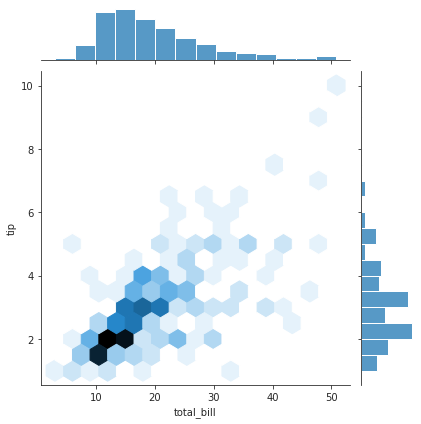

In [14]:
# ao inves de pontos, áreas hexagonais
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

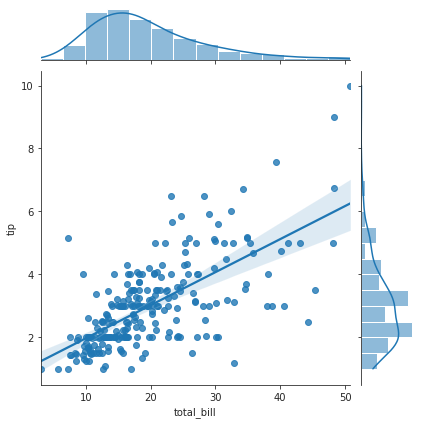

In [15]:
# kind: adiciona uma linha de regressão linear separando em duas classes
# no histograma adiciona uma linha de densidade 
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

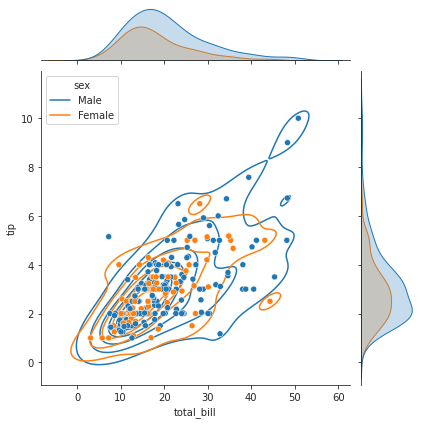

In [16]:
# kde
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="scatter", hue="sex")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

## pairplot
Cria vários gráficos com as distribuições entre todas as variaveis do dataframe

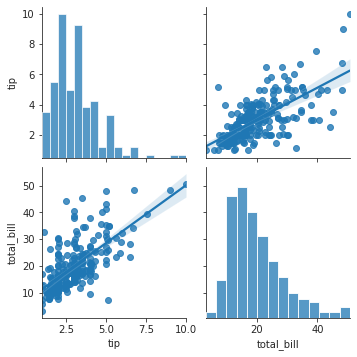

In [17]:
# padrão é o grafico scatter com todas as colunas numéricas
# colunas não numericas não são plotadas
# na diagonal, combinação da mesma medida, cria o histograma da medida
sns.pairplot(data=tips[["tip", "total_bill"]], kind="reg")

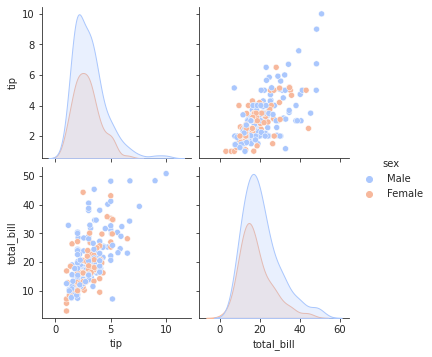

In [18]:
# segmentando pela coluna "sex" usando hue
sns.pairplot(data=tips[["sex", "tip", "total_bill"]], hue="sex", palette='coolwarm')

# Plots categóricos
São dados discretos que são classificados em quantidades específicas de categorias.
>* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

## barplot e countplot

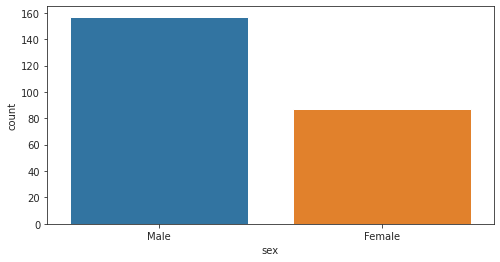

In [19]:
# faz a contagem de linhas por categoria (não precisa definir o eixo y - padrão count)
sns.countplot(x="sex", data=tips)

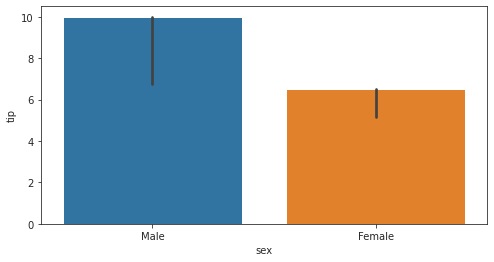

In [20]:
# barplot é semelhante a countplot, mas permite controlar qual coluna será agregada e qual função será usada
# maior valor de tip por sex
# senão informar o estimator é usado o valor médio
sns.barplot(x="sex", y="tip", data=tips, estimator=np.max)

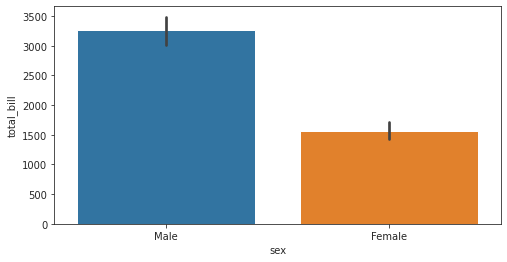

In [21]:
# soma do total_bill por sex
sns.barplot(x="sex", y="total_bill", data=tips, estimator=np.sum)

## boxplot e violinplot
Exibem a distribuição dos dados categoricos com relação a um data numérico. A caixa os quartis do conjunto de dados.


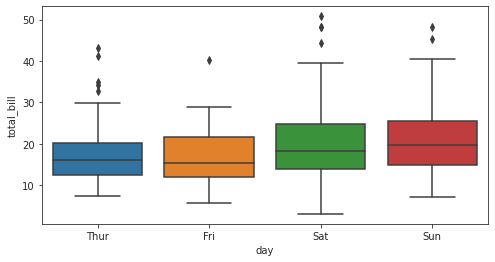

In [22]:
# plota os quartis 0% - 25% - 50% - 75% - 100%
# os pontos fora do box são considerados outliers (não se adequam a distribuição)
sns.boxplot(x="day", y="total_bill", data=tips)

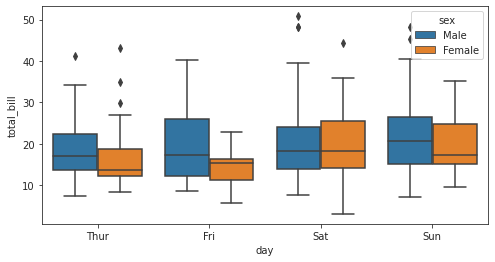

In [23]:
sns.boxplot(x="day", y="total_bill", data=tips, hue="sex")

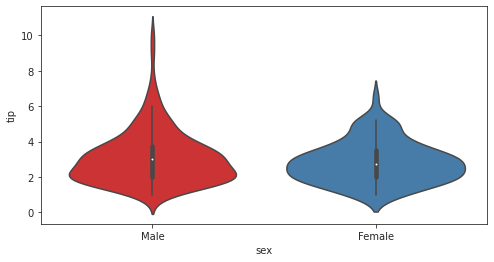

In [24]:
# violinplot: semelhante a boxplot mas adiciona uma estimativa de densidade em cada parte do boxplot
# é como um boxplot misturado com um histograma
sns.violinplot(x="sex", y="tip", data=tips, palette='Set1')

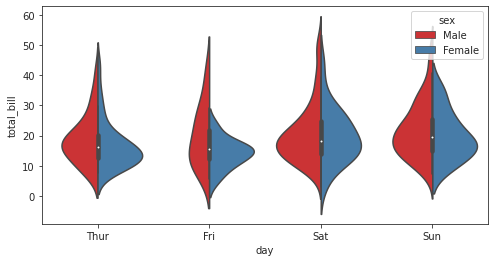

In [25]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex', split=True, palette='Set1')

## stripplot e swarmplot
é uma espécie de scatter para variaveis categoricas, pode ser um bom complemento para um boxplot pois além de mostrar o quartis tambem mostraria a densidade

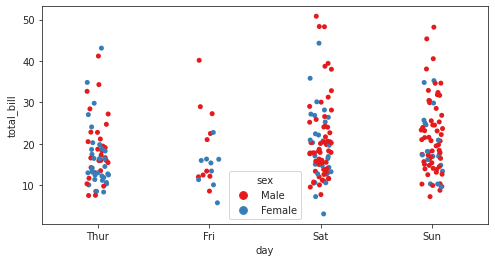

In [26]:
# jitter: coloca os pontos menos sobrepostos
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex',palette='Set1')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


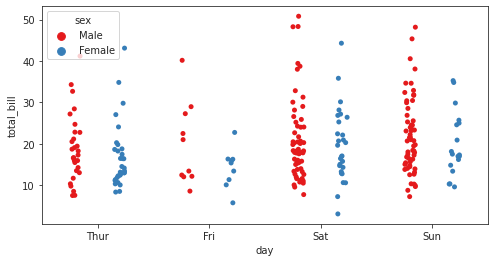

In [27]:
# split separa o hue para ajudar na visualização
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, split=True, hue='sex',palette='Set1')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


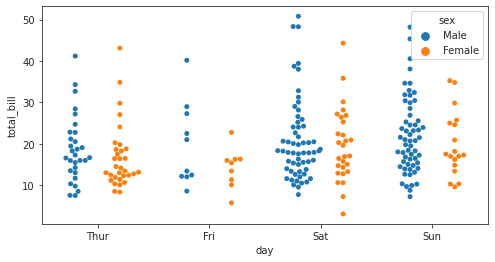

In [28]:
# swarmplot é igual ao stripplot mas não deixa sobreposições
# coloca os pontos um ao lado do outro quando estão na mesma altura
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, split=True)

### combinando graficos swarmplot com boxplot

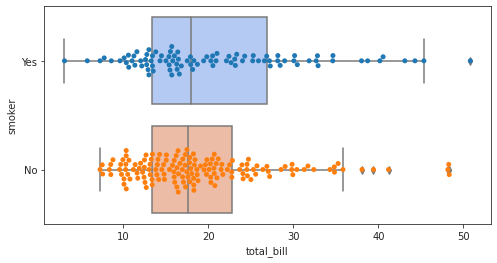

In [36]:
sns.boxplot(x="total_bill", y="smoker", data=tips, palette='coolwarm')
# sns.violinplot(x="total_bill", y="smoker", data=tips, palette='coolwarm')
sns.swarmplot(x="total_bill", y="smoker", data=tips)

## factorplot
é um tipo generico que aceita o parametro kind para dizer qual tipo de grafico exibir

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


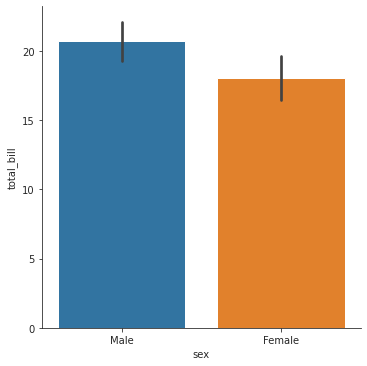

In [30]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

In [31]:
dados = tips.groupby(["day"], as_index=False).sum()
dados.sort_values("total_bill", ascending=False)

,day,total_bill,tip,size
2,Sat,1778.40,260.40,219
3,Sun,1627.16,247.39,216
0,Thur,1096.33,171.83,152
1,Fri,325.88,51.96,40


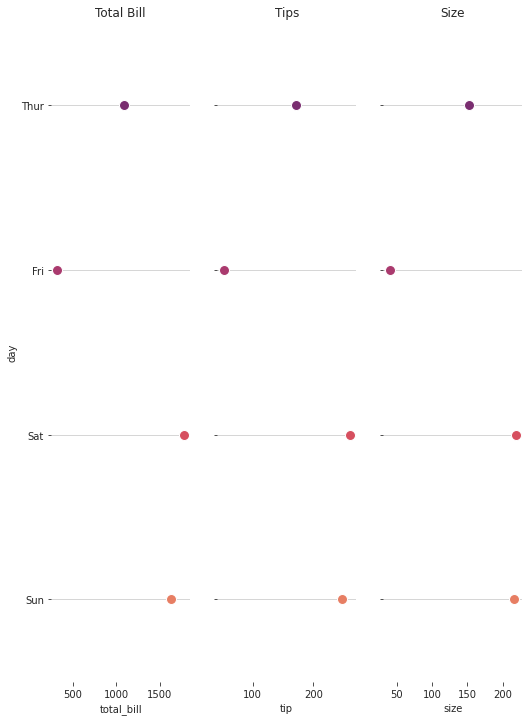

In [32]:
# PairGrid
dados = tips.groupby(["day"], as_index=False).sum()

g = sns.PairGrid(dados.sort_values("total_bill", ascending=False), x_vars=dados.columns[1:4], y_vars=["day"], height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use semantically meaningful titles for the columns
titles = ["Total Bill", "Tips", "Size"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

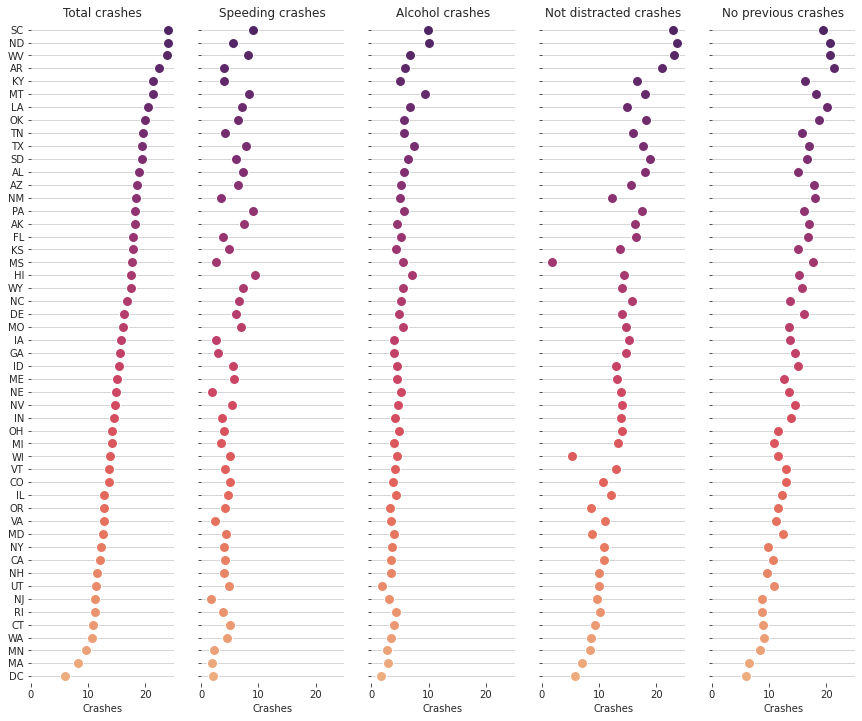

In [33]:
# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False), x_vars=crashes.columns[:-3], y_vars=["abbrev"], height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [34]:
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# Plots matriciais
Dados na forma matricial
- heatmap

## heatmap

In [37]:
# carregando dados
flights = sns.load_dataset("flights")

In [43]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [46]:
# correlação entre as variaveis numericas do dataframe
# diagonal é sempre 1
corr_tips = tips.corr()

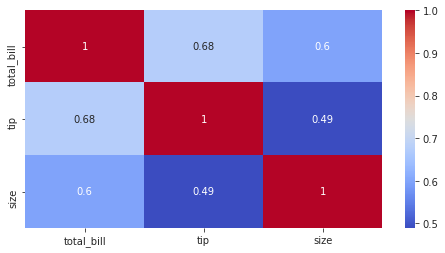

In [51]:
# forma de ver relação entre dua variaveis
sns.heatmap(corr_tips, cmap="coolwarm", annot=True)

In [54]:
# pivot
pf = flights.pivot_table(values="passengers", index="month", columns="year")

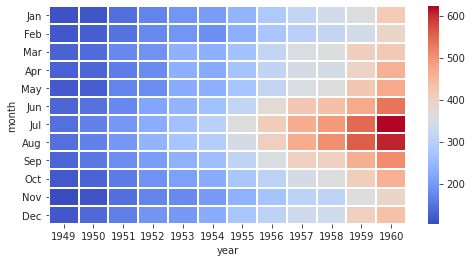

In [70]:
sns.heatmap(pf, cmap="coolwarm", linecolor='white', linewidths=1)

## clustermap
Identifica agrupamentos dentro dos heatmaps

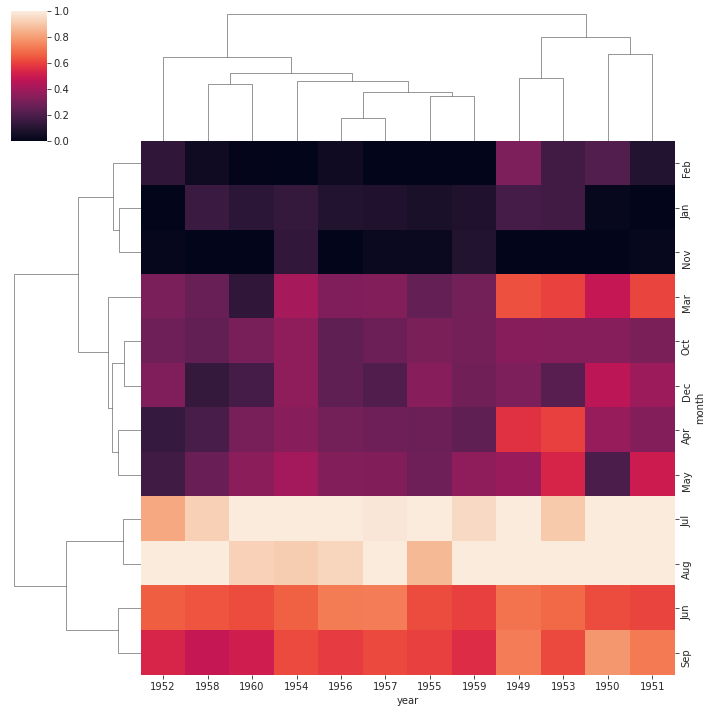

In [69]:
sns.clustermap(pf, standard_scale=1)

# Plots de regressão

In [71]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot
linear model plot
https://seaborn.pydata.org/generated/seaborn.lmplot.html

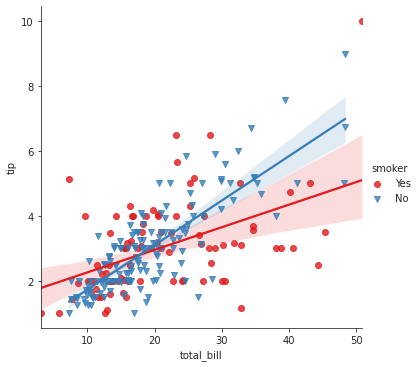

In [76]:
# cria um grafico de dispersão e uma reta que melhor separa os dados 
# a parte sombreada representa maior variabilidade entre os pontos
sns.lmplot(x="total_bill", y="tip", data=tips, hue="smoker", markers=["o", "v"],palette="Set1")

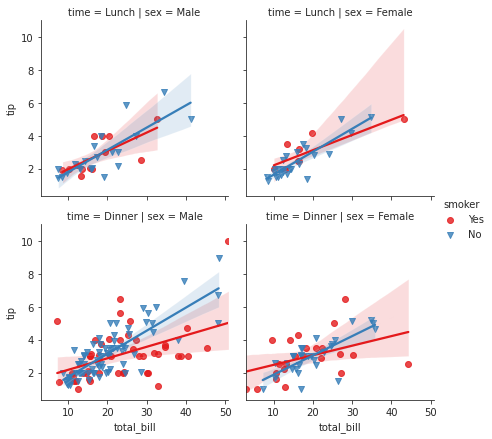

In [80]:
# separando em multiplos graficos
sns.lmplot(x="total_bill", y="tip", data=tips, hue="smoker", markers=["o", "v"],palette="Set1", col="sex", row="time", height=3)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


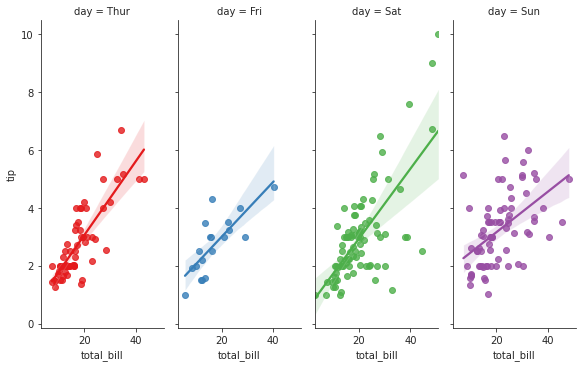

In [86]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue="day", palette="Set1", col="day", aspect=0.4, size=5)

# Pair Grids
Permite mais customização na forma de construção, informando a função que será usada para mapear

In [87]:
iris = sns.load_dataset("iris")

In [88]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [90]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [92]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

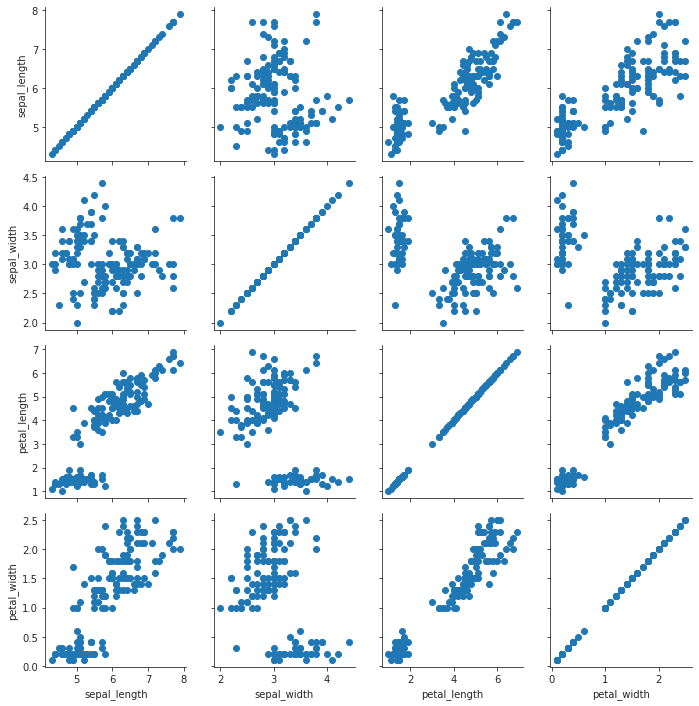

In [98]:
# cria um grid em branco com a correlação entre as variaveis numericas
g = sns.PairGrid(iris)

# mapeando o grafico de scatter (semelhante ao pairplot)
g.map(plt.scatter)

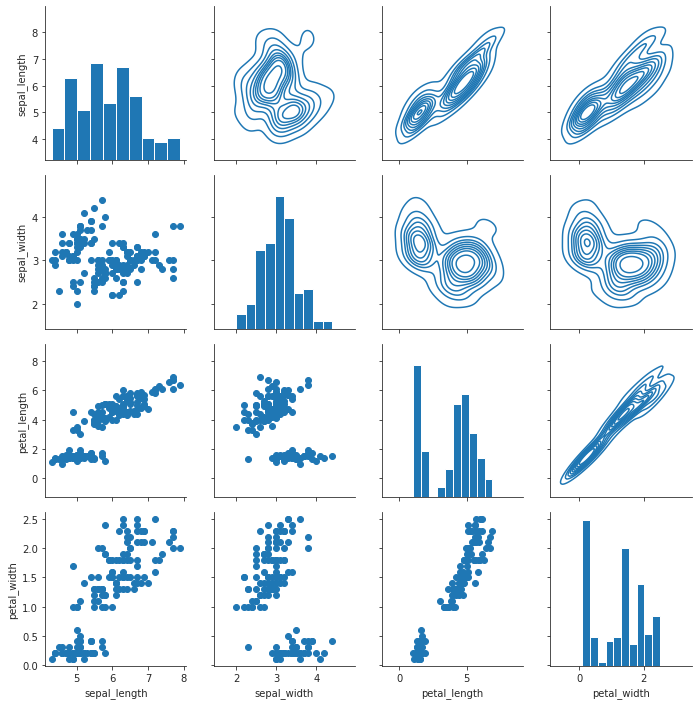

In [101]:
g = sns.PairGrid(iris)

# mapeando apenas as diagonais
g.map_diag(plt.hist)

# graficos acima da diagonal
g.map_upper(sns.kdeplot)

g.map_lower(plt.scatter)

# FacetGrid


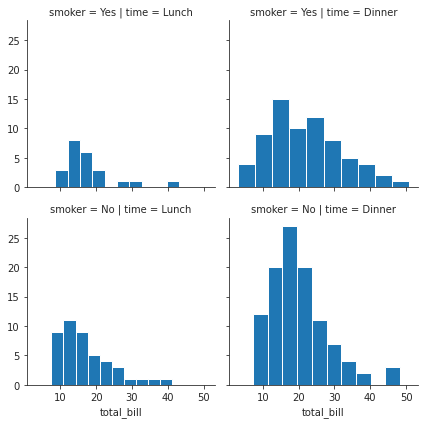

In [107]:
# cria um grid customizavel
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map(plt.hist, "total_bill")